In [ ]:
!pip install bltk
!pip install nltk
from google.colab import drive
drive.mount('/content/gdrive')
from pydrive.drive import GoogleDrive
import bltk
import nltk
import numpy as np
import regex as re
import pandas as pd
nltk.download('punkt')
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC, SVC
from nltk.tokenize import word_tokenize
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from bltk.langtools import Tokenizer, remove_stopwords
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from nltk.tokenize.treebank import TreebankWordDetokenizer
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LinearRegression, SGDClassifier, LogisticRegression
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
import seaborn as sns



     |████████████████████████████████| 17.4MB 1.4MB/s 
     |████████████████████████████████| 1.4MB 44.2MB/s 
  Created wheel for bltk: filename=bltk-1.2-cp36-none-any.whl size=17432534 sha256=bf86317ac6ab6a8ffd9bead9c9bb214989a412469fdd61bd95335e2c887705a4
  Stored in directory: /root/.cache/pip/wheels/8d/a2/28/31c169557c41c3c6c2227874781112102bd01578931f35803f
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434676 sha256=46f53bae36a8c93110b09bbaa4447edd89c6964976acff65cdbf555d19411d6c
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built bltk nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5
Mounted at /content/gdrive


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
dataset= pd.read_excel(r'/content/gdrive/My Drive/thesis_dataset/Final_data_set.xlsx')
# dataset = dataset[dataset['Label']!=3]
# dataset = dataset[dataset['Label']!=2]
print(dataset)

                                                   text  label
0     এই লকডাউনের সময়ে এই দামে    একটি পণ্য পাওয়ার আ...      0
1     এখন বাকি দেখতে হবে কাজটা কেমন তাহলেই বুঝতে পার...      0
2     আমি দুইটা air pot order করে একটি পেয়েছি কিন্তু...      0
3     দারাজে স্ক্রল করতে করতে চোখে পড়লো তাই নিয়ে ফেল...      0
4                 আগে ব্যবহার করি তারপর আমার মতামত বলব।      0
...                                                 ...    ...
2865  সেলারের আন্তরিকতা এবং ফ্রেন্ডলি মাইন্ড সবচে' ভ...      3
2866  যারা হালকা কাজ করতে চান এবং অল্প দামে নতুন ল্য...      3
2867  খুবই ভাল লেগেছে সব কিছুই ঠিকমতো আছে ।।সমস্যা হ...      2
2868  সমস্যা হল এক্সট্রা স্পিকার অ্যাড করলেও টিভির স...      1
2869  দামের তুলনায় ভালো। তবে প্রিমিয়াম না। ফিনিশিং ট...      3

[2870 rows x 2 columns]


label
0    304
1    835
2    438
3    438
4    855
dtype: int64


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Number of Reviews')

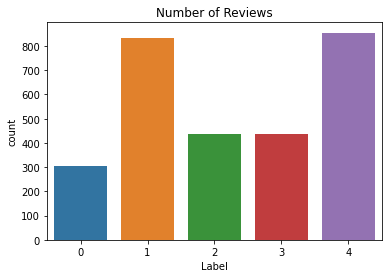

In [ ]:
print(dataset.groupby('label').size())

sns.countplot(dataset.label)
plt.xlabel('Label')
plt.title('Number of Reviews')

In [ ]:
data = dataset
X = data['text'].dropna()
X.dropna(inplace=True)
print(X)

 
y = data['label'].dropna()
y.dropna(inplace=True)
len(y)
 
lebel=[]
for item in y:
    lebel.append(int(item))

0       এই লকডাউনের সময়ে এই দামে    একটি পণ্য পাওয়ার আ...
1       এখন বাকি দেখতে হবে কাজটা কেমন তাহলেই বুঝতে পার...
2       আমি দুইটা air pot order করে একটি পেয়েছি কিন্তু...
3       দারাজে স্ক্রল করতে করতে চোখে পড়লো তাই নিয়ে ফেল...
4                   আগে ব্যবহার করি তারপর আমার মতামত বলব।
                              ...                        
2865    সেলারের আন্তরিকতা এবং ফ্রেন্ডলি মাইন্ড সবচে' ভ...
2866    যারা হালকা কাজ করতে চান এবং অল্প দামে নতুন ল্য...
2867    খুবই ভাল লেগেছে সব কিছুই ঠিকমতো আছে ।।সমস্যা হ...
2868    সমস্যা হল এক্সট্রা স্পিকার অ্যাড করলেও টিভির স...
2869    দামের তুলনায় ভালো। তবে প্রিমিয়াম না। ফিনিশিং ট...
Name: text, Length: 2870, dtype: object


In [ ]:
pattern=r"([!@#$%^&*(),\-.?-_+\`·:={}|<>A-Za-z0-90.0।Ⓒ©®»/০-৯'])"
emoticon= re.compile("[\U00010000-\U0010ffff'|'\u1000-\uffff']", flags=re.UNICODE)
def preprocess(string):
  result=re.sub(pattern," ",str(string))
  vlue=word_tokenize(result)
  def strip_emoji(bbc):
    return emoticon.sub(r'',str(bbc))  
  text=strip_emoji(result)
  vlue=word_tokenize(text)
  text=strip_emoji(text)
  Single_list=list(dict.fromkeys(vlue))
  return Single_list
new=[]
for lines in X:
  result = preprocess(lines)
  new.append(result)
print(new)

[['এই', 'লকডাউনের', 'সময়ে', 'দামে', 'একটি', 'পণ্য', 'পাওয়ার', 'আশা', 'খুব', 'ই', 'ছিল'], ['এখন', 'বাকি', 'দেখতে', 'হবে', 'কাজটা', 'কেমন', 'তাহলেই', 'বুঝতে', 'পারবো', 'যে'], ['আমি', 'দুইটা', 'করে', 'একটি', 'পেয়েছি', 'কিন্তু', 'দুইটার', 'টাকা', 'দিছি', 'এখন', 'কি', 'করবো'], ['দারাজে', 'স্ক্রল', 'করতে', 'চোখে', 'পড়লো', 'তাই', 'নিয়ে', 'ফেললাম'], ['আগে', 'ব্যবহার', 'করি', 'তারপর', 'আমার', 'মতামত', 'বলব'], ['দারাজে', 'স্ক্রল', 'করতে', 'চোখে', 'পড়লো', 'তাই', 'নিয়ে', 'ফেললাম'], ['দিন', 'ধরেই', 'নিবো', 'ভাবছিলাম', 'আজ', 'নিয়ে', 'ফেললাম'], ['আমার', 'আগের', 'হেডফোনটা', 'হারায়', 'যাওয়াতে', 'এই', 'প্রোডাক্টটা', 'নিয়ে', 'নিলাম'], ['দিন', 'ধরেই', 'নেওয়ার', 'দরকার', 'ছিলো', 'তাই', 'নিছি'], ['শখের', 'বসে', 'নিলাম'], ['আমার', 'ভাই', 'সাজেস্ট', 'করলো', 'তাই', 'নিলাম'], ['হুদাই', 'নিছি'], ['এই', 'মাত্র', 'হাতে', 'পেলাম'], ['প্রয়োজন', 'ছিলো', 'তাও', 'নিলাম'], ['বাবার', 'জন্য', 'নিলাম'], ['ওয়ারেন্টি', 'কনফার্ম', 'কি', 'করে', 'হবো'], ['দরকার', 'ছিলো', 'তাও', 'কিনলাম'], ['ওয়ারেন্টি', 'কার্ড', 'টা', 'কি', 'পাট

In [ ]:
negations = ["না", "নি", "নাই", "নাহ"]
contradictors= ["দাম","কম","দামে","কমে","অল্প","সমস্যা"]
def sentiments(text):
  sentiwords = pd.read_excel(r'/content/gdrive/My Drive/thesis_dataset/Final_Senti_word.xlsx')
  positive_words = sentiwords['Positive '].tolist()
  negative_words = sentiwords['Negetive'].tolist()
  positive_count = 0
  negative_count = 0
  neutral_count = 0
  contradictory = 0
  contradictory1 = 0
  length=len(text)
  ValueCount=[]
  for j in range(0, length-1):
    if text[j] in negative_words:
      if text[j+1] in negations:
        contradictory+=1
  for j in range(0, length-2):
    if text[j] in negative_words:
      if text[j+2] in negations:
        contradictory+=1
  for j in range(0, length-1):
    if text[j] == contradictors[0]:
      if text[j+1] == contradictors[1] or text[j+1] == contradictors[3] or text[j+1] == contradictors[4]:
        contradictory1 +=1
    elif text[j] == contradictors[1]:
      if text[j+1] == contradictors[0] or text[j+1] == contradictors[2]:
        contradictory1 +=1
      elif text[j+1] == contradictors[5]:
        contradictory +=1
    elif text[j] == contradictors[1]:
      if text[j+1] == contradictors[0] or text[j+1] == contradictors[2]:
        contradictory1 +=1
    elif text[j] == contradictors[4]:
      if text[j+1] == contradictors[0] or text[j+1] == contradictors[2]:
        contradictory1 +=1
    elif text[j] == contradictors[5]:
      if text[j+1] == contradictors[1]:
        contradictory +=1

  for first_word in text:
    if first_word in negative_words:
      negative_count+=1
    elif first_word in positive_words:
      positive_count+=1
    else:
      neutral_count+=1

  if contradictory > 0 :
    return 3
  if contradictory1 > 0 :
    return 4
  elif negative_count > 0 and positive_count == 0:
    return 1
  elif positive_count > 0 and negative_count==0:
    return 4
  elif positive_count > negative_count:
    return 3
  elif positive_count ==0 and negative_count == 0:
    return 0
  elif positive_count == negative_count:
    return 2
  elif positive_count > negative_count:
    return 3
  elif negative_count > positive_count:
    return 2
  else:
    return 0
  
output_label = []
for sen in new: 
  ouput = sentiments(sen) 
  output_label.append(ouput)
print(output_label)
print(lebel)

[0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 4, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 4, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 4, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 4, 4, 4, 4, 4, 3, 4, 4, 0, 4, 4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 2, 4, 4, 0, 4, 4, 4, 4, 3, 4, 4, 2, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 

In [ ]:
X_one=np.array(lebel)
X = np.reshape(X_one, (-1, 1))
 
y_one=np.array(output_label)
y1=np.reshape(y_one, (-1, 1))
X_train,X_test,y_train,y_test= train_test_split(X,y1,test_size=0.2, random_state=43)
print(len(X_train))
print(len(X_test))


2296
574


In [ ]:

X_train=X_train.reshape(-1,1)

 
text_clf=Pipeline([('Classifier', XGBClassifier())])
text_clf.fit(X_train,y_train)

text_clf3=Pipeline([('Classifier', KNeighborsClassifier())])
text_clf3.fit(X_train,y_train)
 
text_clf1=Pipeline([('Classifier', RandomForestClassifier())])
text_clf1.fit(X_train,y_train)

text_clf2=Pipeline([('Classifier', svm.SVC(kernel='linear'))])
text_clf2.fit(X_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  self._final_estimator.fit(Xt, y, **fit_params)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:354: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for examp

Pipeline(memory=None,
         steps=[('Classifier',
                 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='linear', max_iter=-1,
                     probability=False, random_state=None, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [ ]:

prediction= text_clf.predict(X_test)
prediction1 = text_clf1.predict(X_test)
prediction2 = text_clf2.predict(X_test)
prediction3 = text_clf3.predict(X_test)

print(metrics.confusion_matrix(y_test,prediction))
print(classification_report(y_test,prediction))
print(metrics.accuracy_score(y_test,prediction))
print(f"\n\n\nAccuracy : {metrics.accuracy_score(y_test,prediction):2.2%}\n\n\n\n")
p=metrics.accuracy_score(y_test,prediction)
df = pd.DataFrame(metrics.confusion_matrix(y_test,prediction), index=['Neutral','Negative','S. Negative','S. Positive','Positive'], columns=['Neutral','Negative','S. Negative','S. Positive','Positive'])
print(df)
print("\n\n")


print(f"\n\n{metrics.confusion_matrix(y_test,prediction3)}")
print(classification_report(y_test,prediction3))
df = pd.DataFrame(metrics.confusion_matrix(y_test,prediction3), index=['Neutral','Negative','S. Negative','S. Positive','Positive'], columns=['Neutral','Negative','S. Negative','S. Positive','Positive'])
print(df)
p3=metrics.accuracy_score(y_test,prediction3)
print(f"\n\n\nAccuracy : {metrics.accuracy_score(y_test,prediction3):2%}\n\n\n\n")


#print(f"\n\n{metrics.confusion_matrix(y_test,prediction1)}")
print(classification_report(y_test,prediction1))
df = pd.DataFrame(metrics.confusion_matrix(y_test,prediction1), index=['Neutral','Negative','S. Negative','S. Positive','Positive'], columns=['Neutral','Negative','S. Negative','S. Positive','Positive'])
print(df)
p1=metrics.confusion_matrix(y_test,prediction1)
print(f"\n\n\nAccuracy : {metrics.accuracy_score(y_test,prediction1):2.2%}\n\n\n\n")



print(f"\n\n{metrics.confusion_matrix(y_test,prediction2)}")
print(classification_report(y_test,prediction2))
df = pd.DataFrame(metrics.confusion_matrix(y_test,prediction2), index=['Neutral','Negative','S. Negative','S. Positive','Positive'], columns=['Neutral','Negative','S. Negative','S. Positive','Positive'])
print(df)
p2=metrics.accuracy_score(y_test,prediction2)
print(f"\n\n\nAccuracy : {metrics.accuracy_score(y_test,prediction2):2.2%}\n\n\n\n")

[[ 40   8   0   0   2]
 [  2 110   2   1   0]
 [  0  27  70  11   6]
 [  0  14  20  76  13]
 [  1   2   3  21 145]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86        50
           1       0.68      0.96      0.80       115
           2       0.74      0.61      0.67       114
           3       0.70      0.62      0.66       123
           4       0.87      0.84      0.86       172

    accuracy                           0.77       574
   macro avg       0.78      0.77      0.77       574
weighted avg       0.78      0.77      0.77       574

0.7682926829268293



Accuracy : 76.83%




             Neutral  Negative  S. Negative  S. Positive  Positive
Neutral           40         8            0            0         2
Negative           2       110            2            1         0
S. Negative        0        27           70           11         6
S. Positive        0        14           20           76        13
Positive        

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


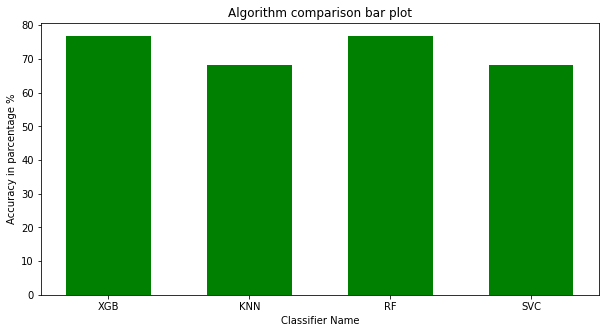

In [ ]:

data = {'XGB':76.83, 'KNN':68.11, 'RF':76.83,  'SVC':68.12} 
c = list(data.keys()) 
values = list(data.values()) 
   
fig = plt.figure(figsize = (10, 5)) 

plt.bar(c, values, color ='Green',  width = 0.6) 
  
plt.xlabel("Classifier Name") 
plt.ylabel("Accuracy in parcentage %") 
plt.title("Algorithm comparison bar plot") 
plt.show() 


In [ ]:
text_test= input()

tokenije=preprocess(text_test)
print(tokenije)
prediction1=sentiments(tokenije)
print(prediction1)
prediction2=np.reshape(prediction1, (-1, 1))
prediction= text_clf.predict(prediction2)
if prediction1==4:
  print("Positive Review")
elif prediction1==1:
  print("Negative Review")
elif prediction1==3:
  print("Slightly positive Review")
elif prediction1==2:
  print("slightly negative Review")
else:
  print("Neutral Review")

valO
[]
0
Neutral Review
